**Problem statement**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
Data is being committed in github repo, let's read it from there

In [208]:
!rm -rf '/tmp/MelanomaDetectionCNN-main'

In [209]:
import zipfile
import os

In [210]:
!wget --no-check-certificate \
    "https://github.com/yashyasviagarwal/MelanomaDetectionCNN/archive/refs/heads/main.zip" \
    -O "/tmp/melanomaDetection.zip"

--2022-11-16 18:57:31--  https://github.com/yashyasviagarwal/MelanomaDetectionCNN/archive/refs/heads/main.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/yashyasviagarwal/MelanomaDetectionCNN/zip/refs/heads/main [following]
--2022-11-16 18:57:32--  https://codeload.github.com/yashyasviagarwal/MelanomaDetectionCNN/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/melanomaDetection.zip’

/tmp/melanomaDetect     [  <=>               ] 786.15M  16.0MB/s    in 51s     

2022-11-16 18:58:24 (15.3 MB/s) - ‘/tmp/melanomaDetection.zip’ saved [824342340]



In [211]:
%ls /tmp

__autograph_generated_fileex3j5i5y.py
__autograph_generated_filel3fp070m.py
__autograph_generated_fileq6y76lkn.py
__autograph_generated_filetvfte1ll.py
dap_multiplexer.e8aa204123ef.root.log.INFO.20221116-161747.65
dap_multiplexer.INFO@
debugger_1im37w6oq8=
initgoogle_syslog_dir.0/
kernel_manager_proxy.e8aa204123ef.root.log.INFO.20221116-161741.12
kernel_manager_proxy.INFO@
melanomaDetection.zip
__pycache__/
pyright-1085-4rmQl7kM2jGh/
pyright-1085-fB78IoN3xmVg/
pyright-113-2k6GDzJnPl0q/
pyright-113-4TV9Q4qopuHk/
pyright-2578-E8qD0IxOX9z1/
pyright-2578-Vka6Ou05lDCM/
pyright-2823-D2Pscv1FCr3V/
pyright-2823-uARBK68b1IJC/
pyright-2833-NEUsOdwF2VMH/
pyright-2833-poHF4lptNr3A/
pyright-3428-Ac2ud4JfeVF1/
pyright-3428-wIH3R3n2Yu0l/
pyright-4654-ezWn8dVx7NPE/
pyright-4654-z04E3M80NPSK/
pyright-4814-8Dn7RVw7bFma/
pyright-4814-c3uC0WBmoHnc/
pyright-6011-aTOVEklVxKFb/
pyright-6011-zY3BNncLShY3/
pyright-687-1YzmAlwAul02/
pyright-687-IE9DF04Z5WyO/
pyright-845-pBFW6JMijtTv/
pyright-845-pLxW1QPFNFpq/
p

In [212]:
zip_ref = zipfile.ZipFile('/tmp/melanomaDetection.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [213]:
%ls /tmp

__autograph_generated_fileex3j5i5y.py
__autograph_generated_filel3fp070m.py
__autograph_generated_fileq6y76lkn.py
__autograph_generated_filetvfte1ll.py
dap_multiplexer.e8aa204123ef.root.log.INFO.20221116-161747.65
dap_multiplexer.INFO@
debugger_1im37w6oq8=
initgoogle_syslog_dir.0/
kernel_manager_proxy.e8aa204123ef.root.log.INFO.20221116-161741.12
kernel_manager_proxy.INFO@
MelanomaDetectionCNN-main/
melanomaDetection.zip
__pycache__/
pyright-1085-4rmQl7kM2jGh/
pyright-1085-fB78IoN3xmVg/
pyright-113-2k6GDzJnPl0q/
pyright-113-4TV9Q4qopuHk/
pyright-2578-E8qD0IxOX9z1/
pyright-2578-Vka6Ou05lDCM/
pyright-2823-D2Pscv1FCr3V/
pyright-2823-uARBK68b1IJC/
pyright-2833-NEUsOdwF2VMH/
pyright-2833-poHF4lptNr3A/
pyright-3428-Ac2ud4JfeVF1/
pyright-3428-wIH3R3n2Yu0l/
pyright-4654-ezWn8dVx7NPE/
pyright-4654-z04E3M80NPSK/
pyright-4814-8Dn7RVw7bFma/
pyright-4814-c3uC0WBmoHnc/
pyright-6011-aTOVEklVxKFb/
pyright-6011-zY3BNncLShY3/
pyright-687-1YzmAlwAul02/
pyright-687-IE9DF04Z5WyO/
pyright-845-pBFW6JMijtTv/


### Importing all the important libraries

In [214]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [215]:
# ## If you are using the data by mounting the google drive, use the following :

# from google.colab import drive
# drive.mount('/content/gdrive')


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [216]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/tmp/MelanomaDetectionCNN-main/SkinCancerDataset/Train")
data_dir_test = pathlib.Path('/tmp/MelanomaDetectionCNN-main/SkinCancerDataset/Test')

In [217]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [218]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [219]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory= data_dir_train,
    labels='inferred',
    label_mode='int',
    batch_size = batch_size,validation_split=0.2,subset="training",
    image_size=(img_height, img_width),seed = 123)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [220]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory= data_dir_train,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,validation_split=0.2,subset="validation",
    image_size=(img_height, img_width),seed = 123)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [221]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

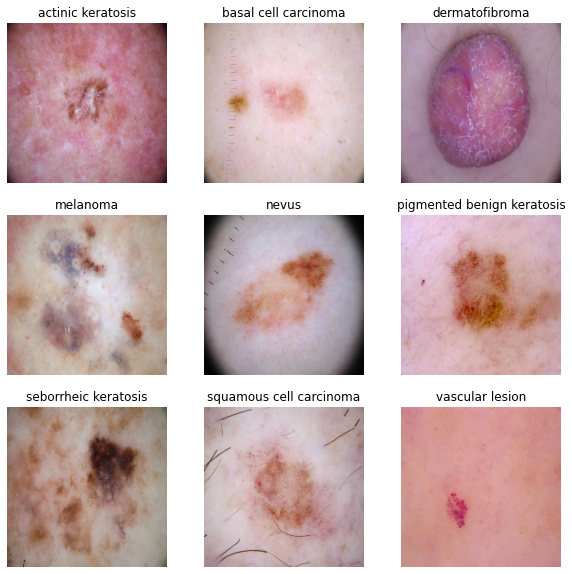

In [222]:
import matplotlib.pyplot as plt
### your code goes here, you can use training or validation data to visualize
plt.figure(figsize = (10,10))
for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [223]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [224]:
### Your code goes here
num_class = 9
model = Sequential([
    layers.experimental.preprocessing.Rescaling(scale = 1./255,input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(num_class,activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [225]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [226]:
# View the summary of all layers
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_15 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 45, 45, 64)      

### Train the model

In [227]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/20
56/56 [==============================] - 14s 69ms/step - loss: 2.0887 - accuracy: 0.2132 - val_loss: 1.9198 - val_accuracy: 0.3043
Epoch 2/20
56/56 [==============================] - 1s 24ms/step - loss: 1.8449 - accuracy: 0.3170 - val_loss: 1.8274 - val_accuracy: 0.3289
Epoch 3/20
56/56 [==============================] - 1s 23ms/step - loss: 1.6649 - accuracy: 0.4012 - val_loss: 1.6218 - val_accuracy: 0.4430
Epoch 4/20
56/56 [==============================] - 1s 23ms/step - loss: 1.4711 - accuracy: 0.4866 - val_loss: 1.4249 - val_accuracy: 0.5369
Epoch 5/20
56/56 [==============================] - 1s 24ms/step - loss: 1.4298 - accuracy: 0.5050 - val_loss: 1.4935 - val_accuracy: 0.4966
Epoch 6/20
56/56 [==============================] - 1s 23ms/step - loss: 1.2919 - accuracy: 0.5407 - val_loss: 1.3666 - val_accuracy: 0.5302
Epoch 7/20
56/56 [==============================] - 1s 23ms/step - loss: 1.2085 - accuracy: 0.5698 - val_loss: 1.4062 - val_accuracy: 0.5257
Epoch 8/20
5

### Visualizing training results

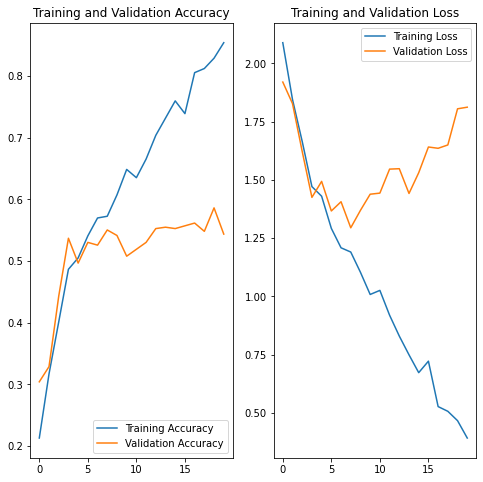

In [228]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit


### Write your findings here

It's clearly visible that the model has overfit as training accuracy could rach a maximum of 0.84 which is much higher than the maximum validation accuracy of 0.82. Hence, we need to do appropriate data augmentation to handle the overfitting. Since colorspace transformation, random erasing, kernal filters and mixing images methods all can cause loss of integrity of the image in our case of melanoma detection and hence lower the accuracy of model, geometric transformations would be the suitable data augmentation to do.

In [229]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.1),
])

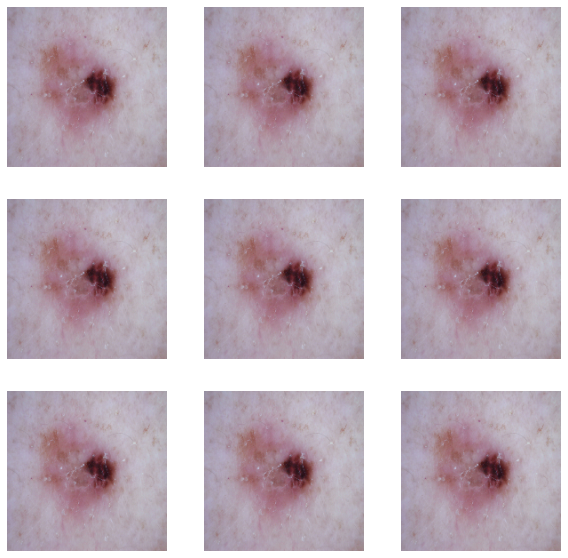

In [230]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


### Create the model, compile and train the model


In [231]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here
num_class = 9
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255 , input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_class,activation='softmax')
])

### Compiling the model

In [232]:
## Your code goes here
model.compile(optimizer='adam',
            loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [233]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs= 20)

Epoch 1/20
56/56 [==============================] - 4s 49ms/step - loss: 2.0586 - accuracy: 0.2427 - val_loss: 1.8570 - val_accuracy: 0.3244
Epoch 2/20
56/56 [==============================] - 3s 46ms/step - loss: 1.7806 - accuracy: 0.3493 - val_loss: 1.6194 - val_accuracy: 0.4430
Epoch 3/20
56/56 [==============================] - 3s 45ms/step - loss: 1.5793 - accuracy: 0.4275 - val_loss: 1.4312 - val_accuracy: 0.5213
Epoch 4/20
56/56 [==============================] - 3s 45ms/step - loss: 1.4283 - accuracy: 0.4900 - val_loss: 1.4533 - val_accuracy: 0.5101
Epoch 5/20
56/56 [==============================] - 3s 45ms/step - loss: 1.4162 - accuracy: 0.4905 - val_loss: 1.4161 - val_accuracy: 0.5257
Epoch 6/20
56/56 [==============================] - 3s 46ms/step - loss: 1.4682 - accuracy: 0.4749 - val_loss: 1.3975 - val_accuracy: 0.5324
Epoch 7/20
56/56 [==============================] - 3s 45ms/step - loss: 1.3444 - accuracy: 0.5218 - val_loss: 1.3632 - val_accuracy: 0.5414
Epoch 8/20
56

### Visualizing the results

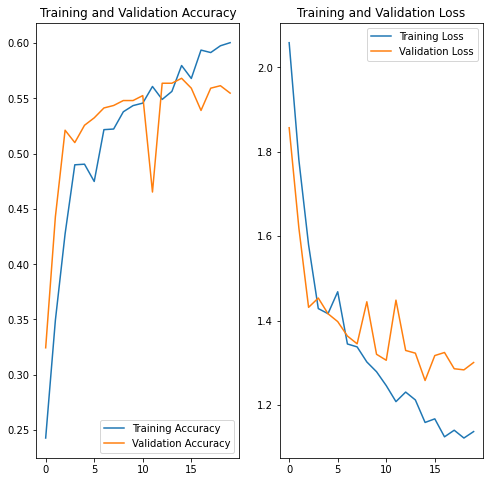

In [234]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
The model is performing better now, and overfitting is handled after data augmentation and addition of drop out layer, which is evidenced from the similar accuracy values of train and validations sets, which are 0.61 and 0.54 respectively. However the accuracy is not very high and we should add some layers to improve accuracy




#### Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

actinic keratosis : 114
basal cell carcinoma : 376
dermatofibroma : 95
melanoma : 438
nevus : 357
pigmented benign keratosis : 462
seborrheic keratosis : 77
squamous cell carcinoma : 181
vascular lesion : 139


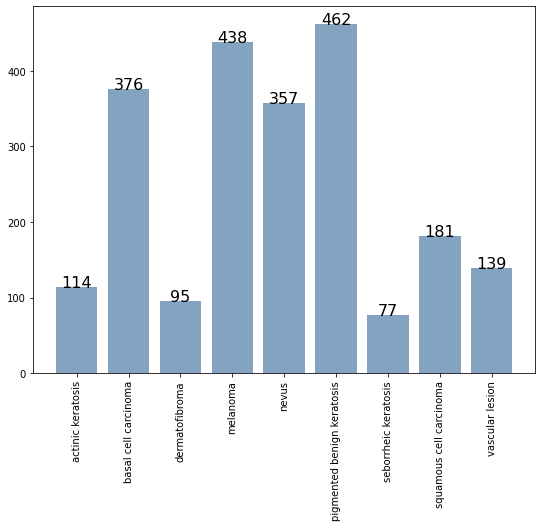

In [235]:
## Your code goes here.
import matplotlib.pyplot as plt
data = dict()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',fontsize=16)

for i in class_names:
  data[i] = []
for i in range(9):
    # print(class_names[i])
    path = class_names[i]+'/*.jpg'
    image_count_train = len(list(data_dir_train.glob(path)))
    data[class_names[i]] = image_count_train
    print(class_names[i],':',image_count_train)
f = plt.figure()
f.set_figwidth(num_class)
f.set_figheight(num_class*0.75)

plt.xticks(rotation='vertical')
plt.bar(range(len(data)), list(data.values()), align='center', color=(0.2, 0.4, 0.6, 0.6))
addlabels(range(len(data)), list(data.values()))
plt.xticks(range(len(data)), list(data.keys()))
plt.show()

#### Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.


#### - Which class has the least number of samples? - **Seborrheic keratosis** with 77 Samples
#### - Which classes dominate the data in terms proportionate number of samples? - **pigmented benign keratosis** with 462 samples


In [236]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [237]:
path_list=[]
lesion_list=[]
for i in class_names:   
  for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/tmp/MelanomaDetectionCNN-main/SkinCancerDatas...,actinic keratosis
1,/tmp/MelanomaDetectionCNN-main/SkinCancerDatas...,actinic keratosis
2,/tmp/MelanomaDetectionCNN-main/SkinCancerDatas...,actinic keratosis
3,/tmp/MelanomaDetectionCNN-main/SkinCancerDatas...,actinic keratosis
4,/tmp/MelanomaDetectionCNN-main/SkinCancerDatas...,actinic keratosis
...,...,...
2234,/tmp/MelanomaDetectionCNN-main/SkinCancerDatas...,vascular lesion
2235,/tmp/MelanomaDetectionCNN-main/SkinCancerDatas...,vascular lesion
2236,/tmp/MelanomaDetectionCNN-main/SkinCancerDatas...,vascular lesion
2237,/tmp/MelanomaDetectionCNN-main/SkinCancerDatas...,vascular lesion


In [238]:
path_to_training_dataset="/tmp/MelanomaDetectionCNN-main/SkinCancerDataset/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /tmp/MelanomaDetectionCNN-main/SkinCancerDataset/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3D5D7D3B50>: 100%|██████████| 500/500 [00:16<00:00, 30.91 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /tmp/MelanomaDetectionCNN-main/SkinCancerDataset/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3D5A1D3FD0>: 100%|██████████| 500/500 [00:18<00:00, 27.48 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /tmp/MelanomaDetectionCNN-main/SkinCancerDataset/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3D5D691950>: 100%|██████████| 500/500 [00:19<00:00, 25.07 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /tmp/MelanomaDetectionCNN-main/SkinCancerDataset/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F3D72433350>: 100%|██████████| 500/500 [01:29<00:00,  5.56 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /tmp/MelanomaDetectionCNN-main/SkinCancerDataset/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F3D7203BE10>: 100%|██████████| 500/500 [01:15<00:00,  6.64 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /tmp/MelanomaDetectionCNN-main/SkinCancerDataset/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3D5A1D3910>: 100%|██████████| 500/500 [00:16<00:00, 29.98 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /tmp/MelanomaDetectionCNN-main/SkinCancerDataset/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F3D52669890>: 100%|██████████| 500/500 [00:38<00:00, 13.04 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /tmp/MelanomaDetectionCNN-main/SkinCancerDataset/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3D5D7DB510>: 100%|██████████| 500/500 [00:16<00:00, 30.87 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /tmp/MelanomaDetectionCNN-main/SkinCancerDataset/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3D5D056210>: 100%|██████████| 500/500 [00:15<00:00, 31.48 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [239]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [240]:
import glob
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[0]

'/tmp/MelanomaDetectionCNN-main/SkinCancerDataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029827.jpg_131442d3-3fed-47fb-91ed-803d08e7e6b9.jpg'

In [241]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
set(lesion_list_new)

{'actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion'}

In [242]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [243]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [244]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [245]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [246]:
data_dir_train="/tmp/MelanomaDetectionCNN-main/SkinCancerDataset/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size= batch_size)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Create a validation dataset

In [247]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Create your model (make sure to include normalization)

In [248]:
## your code goes here
num_class = 9
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255 , input_shape=(img_height, img_width, 3)),
  layers.SeparableConv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.SeparableConv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.SeparableConv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.SeparableConv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(num_class, activation='softmax')
])

#### Compile your model (Choose optimizer and loss function appropriately)

In [249]:
## your code goes here
model.compile(optimizer='adam',
            loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

####  Train your model

In [250]:
epochs = 30
## Your code goes here, use 30 epochs.
history =  model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 30s 170ms/step - loss: 2.1499 - accuracy: 0.3850 - val_loss: 9.7973 - val_accuracy: 0.1151
Epoch 2/30
169/169 [==============================] - 28s 163ms/step - loss: 1.2373 - accuracy: 0.5352 - val_loss: 23.7594 - val_accuracy: 0.1151
Epoch 3/30
169/169 [==============================] - 29s 165ms/step - loss: 0.9745 - accuracy: 0.6295 - val_loss: 19.8076 - val_accuracy: 0.1307
Epoch 4/30
169/169 [==============================] - 29s 165ms/step - loss: 0.7845 - accuracy: 0.6996 - val_loss: 1.8732 - val_accuracy: 0.5850
Epoch 5/30
169/169 [==============================] - 28s 163ms/step - loss: 0.6181 - accuracy: 0.7628 - val_loss: 0.6581 - val_accuracy: 0.7706
Epoch 6/30
169/169 [==============================] - 28s 162ms/step - loss: 0.5171 - accuracy: 0.8082 - val_loss: 0.6903 - val_accuracy: 0.7699
Epoch 7/30
169/169 [==============================] - 28s 162ms/step - loss: 0.4369 - accuracy: 0.8323 - val_loss: 0.7948 - val_accuracy: 0

####  Visualize the model results

Text(0.5, 1.0, 'Training and Validation Loss')

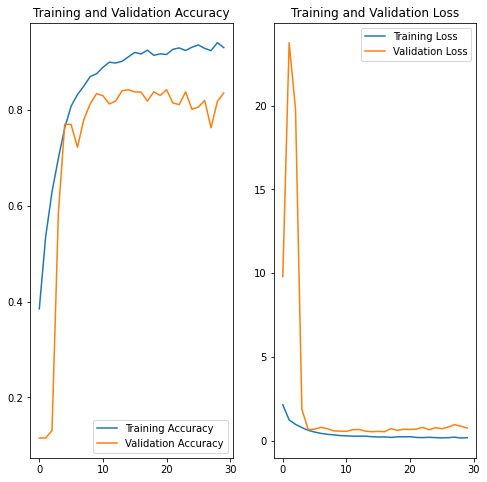

In [251]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# **Validating the model against Test Data**

In [252]:
testData = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    labels='inferred',
    label_mode='categorical',
     batch_size = batch_size,
    image_size=(img_height, img_width),seed = 123)


predictions = np.array([])
labels =  np.array([])
for x, y in testData:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

cm = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()
cm

Found 118 files belonging to 9 classes.
1/1 [==============================] - 0s 158ms/step


array([[ 3,  0,  0,  0, 11,  1,  1,  0,  0],
       [ 1,  7,  0,  0,  1,  5,  0,  2,  0],
       [ 0,  3,  5,  4,  2,  1,  0,  1,  0],
       [ 0,  0,  0,  3,  9,  4,  0,  0,  0],
       [ 0,  0,  0,  1, 10,  5,  0,  0,  0],
       [ 2,  1,  2,  0,  1,  9,  0,  1,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  1,  0],
       [ 3,  4,  0,  0,  3,  2,  0,  3,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  2]], dtype=int32)

In [254]:
import numpy as np
sp = []
f1 = []
gm = []
sens = []
acc= []

for c in range(9):
    tp = cm[c,c]
    fp = sum(cm[:,c]) - cm[c,c]
    fn = sum(cm[c,:]) - cm[c,c]
    tn = sum(np.delete(sum(cm)-cm[c,:],c))

    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    specificity = tn/(tn+fp)
    f1_score = 2*((precision*recall)/(precision+recall))
    g_mean = np.sqrt(recall * specificity)
    sp.append(specificity)
    f1.append(f1_score)
    gm.append(g_mean)
    sens.append(recall)
    acc.append(accuracy)

    print("for class {}: recall {}, specificity {}\
          precision {}, f1 {}, gmean {}".format(c,round(recall,4), round(specificity,4), round(precision,4),round(f1_score,4),round(g_mean,4)))
print("sp: ", np.average(sp))
print("f1: ", np.average(f1))
print("gm: ", np.average(gm))
print("sens: ", np.average(sens))
print("accuracy: ", np.average(acc))

for class 0: recall 0.1875, specificity 0.9412          precision 0.3333, f1 0.24, gmean 0.4201
for class 1: recall 0.4375, specificity 0.9118          precision 0.4375, f1 0.4375, gmean 0.6316
for class 2: recall 0.3125, specificity 0.9804          precision 0.7143, f1 0.4348, gmean 0.5535
for class 3: recall 0.1875, specificity 0.9314          precision 0.3, f1 0.2308, gmean 0.4179
for class 4: recall 0.625, specificity 0.7353          precision 0.2703, f1 0.3774, gmean 0.6779
for class 5: recall 0.5625, specificity 0.8235          precision 0.3333, f1 0.4186, gmean 0.6806
for class 6: recall 0.0, specificity 0.9913          precision 0.0, f1 nan, gmean 0.0
for class 7: recall 0.1875, specificity 0.951          precision 0.375, f1 0.25, gmean 0.4223
for class 8: recall 0.6667, specificity 0.9913          precision 0.6667, f1 0.6667, gmean 0.8129
sp:  0.9174576110637491
f1:  nan
gm:  0.5129770440973652
sens:  0.35185185185185186
accuracy:  0.8568738229755178


The Accuracy on test Model is 85.68%


#### Did you get rid of underfitting/overfitting? Did class rebalance help?



Class rebalance helped to overcome the problem of underfitting. there is a significant increase in the validation accuracy close to 84%. Also test accuracy is 85.68%


#### Assumptions / Considerations:

*   Metric used here is accuracy as the aim is to classify the images accurately.
*   Loss function used is sparse categorical cross entropy that would ensure similar objects are classified into same class and objects from other classes are minimized.


#### Summary:
Note: Various hyperparameters, models are being trained but to limit the notebook, limiting this to only the models that provide some insights of overfit, underfit, and best performance was observed in model with augmentator after class rebalance and normalization, dropouts are being used. Some important observations:



*   Adam optimizer performed better than stochastic gradient descent.
*   Adding dropout and normalization helped to overcome the problem of overfit
*   Adding more convolution layers / more channels increased the model complexity, run time & accuracy proptionately.
